In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/alvar258/.conda/envs/cent7/2024.02-py311/CS587/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download dataset.
path = kagglehub.dataset_download("qingyi/wm811k-wafer-map")
LSWMD_path = os.path.join(path, 'LSWMD.pkl')
print(LSWMD_path)

/home/alvar258/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1/LSWMD.pkl


In [3]:
# Load data in pandas dataframe.
df = pd.read_pickle(LSWMD_path)

# Not all wafer maps has equal size. So, create new column with its shape.
df['waferMapDim'] = df['waferMap'].apply(lambda x: x.shape)

# Fix data.

# 'trianTestLabel': [[np.str_]] -> np.str_
df.rename(columns={'trianTestLabel': 'trainTestLabel'}, inplace=True)
df['trainTestLabel'] = df['trainTestLabel'].apply(lambda x: x[0][0] if x.shape != (0,0) else '')

# 'failureType': [[np.str_]] -> np.str_
df['failureType'] = df['failureType'].apply(lambda x: x[0][0] if x.shape != (0,0) else '')

In [4]:
# Drop data points that have no failure type.
print(f"Original data size: {df.shape}")
df = df[df['failureType'] != '']
print(f"Data size after dropping unlabel data: {df.shape}")

Original data size: (811457, 7)
Data size after dropping unlabel data: (172950, 7)


In [5]:
# Select training and test data.
trainIdx = df[df['trainTestLabel'] == 'Training'].index
testIdx = df[df['trainTestLabel'] == 'Test'].index

# Show each failure type.
trainFailureType = df.loc[trainIdx, 'failureType']
testFailureType = df.loc[testIdx, 'failureType']
uniqueType = df.loc[trainIdx, 'failureType'].unique()
uniqueType.sort()
print(f'Failure types: {uniqueType}')

Failure types: [np.str_('Center') np.str_('Donut') np.str_('Edge-Loc')
 np.str_('Edge-Ring') np.str_('Loc') np.str_('Near-full')
 np.str_('Random') np.str_('Scratch') np.str_('none')]


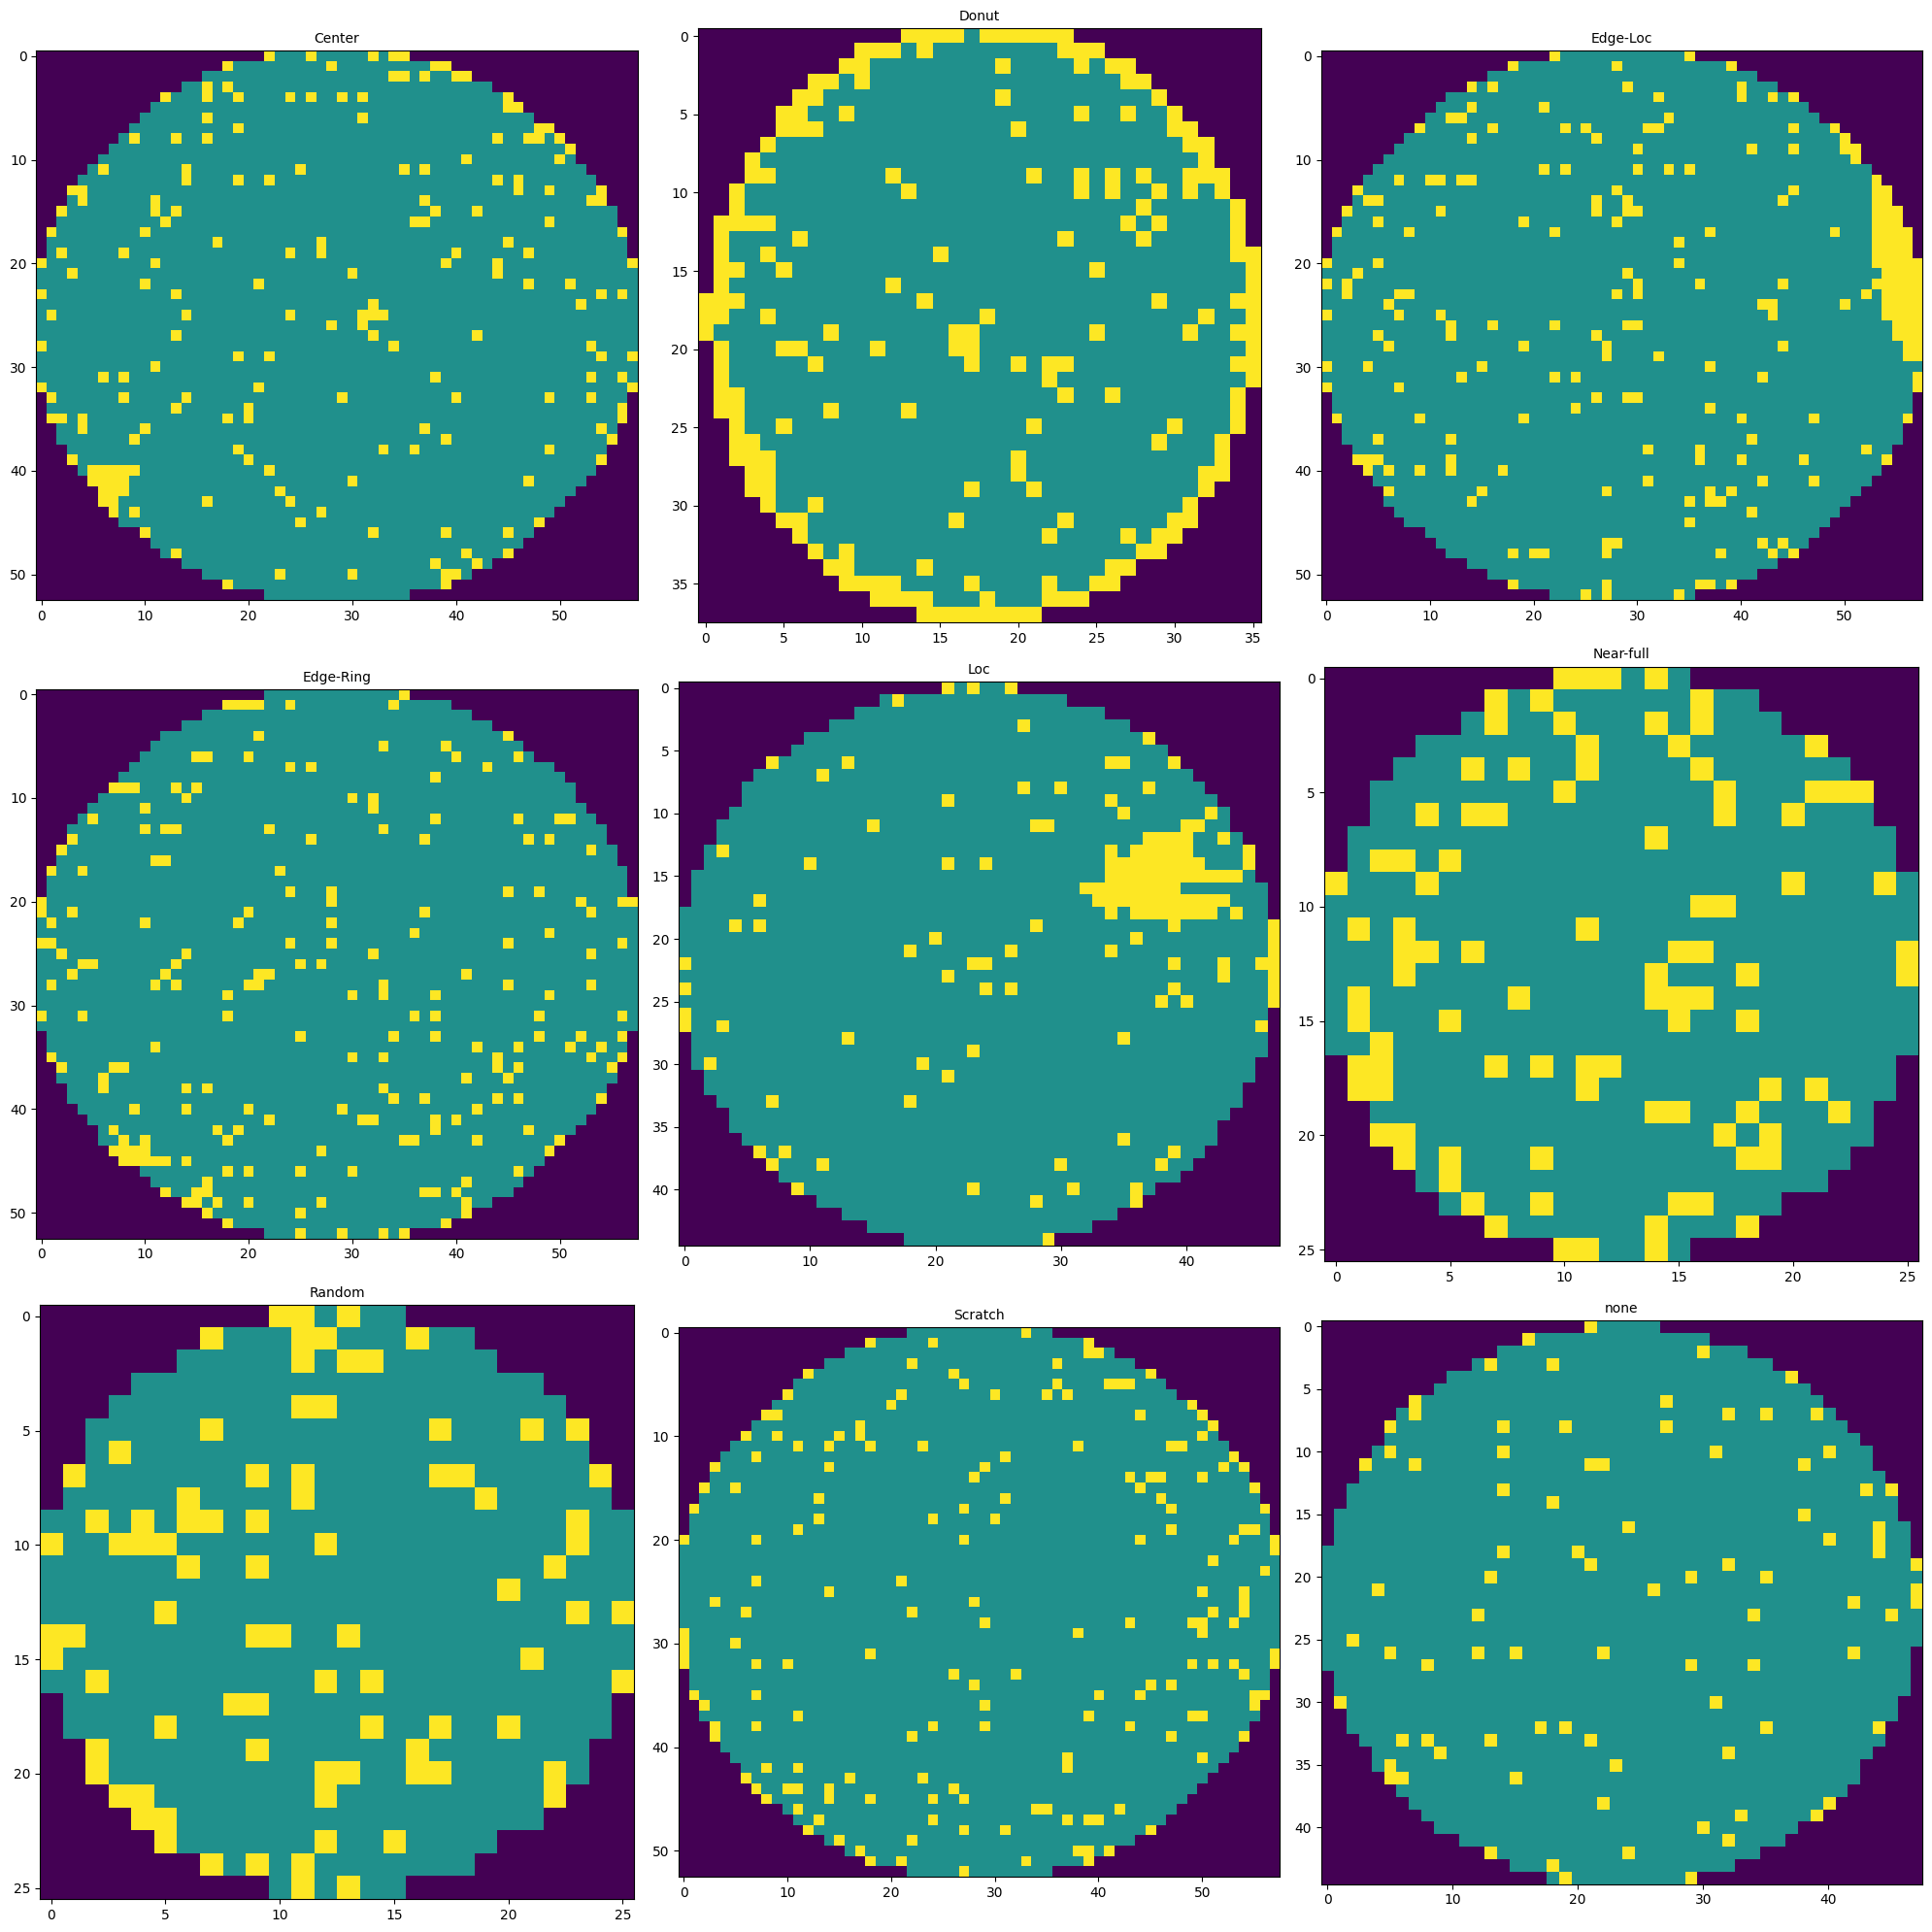

In [6]:
# Plot a wafer map.

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))
ax = ax.ravel(order='C')
for i, failureType in enumerate(uniqueType):
    exampleIdx = trainFailureType[trainFailureType == failureType].index[0]

    ax[i].imshow(df.iloc[exampleIdx]['waferMap'])
    ax[i].set_title(failureType, fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
print(f"minImgShape={min(df.waferMapDim)}, maxImgShape={max(df.waferMapDim)}")

minImgShape=(15, 3), maxImgShape=(212, 84)


In [8]:
df[df['failureType'] != 'none']

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferMapDim
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 48)"
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 58)"
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 58)"
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 58)"
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 58)"
...,...,...,...,...,...,...,...
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc,"(26, 30)"
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc,"(26, 30)"
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring,"(26, 30)"
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc,"(26, 30)"


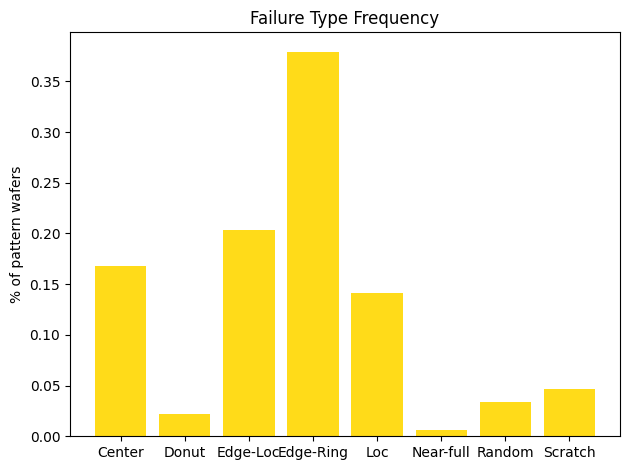

# of examples w/ failure: 147431
# of examples w/o failure: 25519


In [9]:
# Bar chart to see failure type balance.
df_w_failure = df[df['failureType'] != 'none']

x_vals, y_vals = np.unique(df_w_failure['failureType'], return_counts=True)
y_vals = y_vals / df_w_failure.shape[0]

labels2 = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full']

# Plot bars.
plt.bar(x_vals, y_vals, color='gold', align='center', alpha=0.9)

# Labels and styling.
plt.title("Failure Type Frequency")
plt.ylabel("% of pattern wafers")
plt.tick_params(axis='y')
plt.tight_layout()
plt.show()

print(f"# of examples w/ failure: {df[df['failureType'] == 'none'].shape[0]}")
print(f"# of examples w/o failure: {df_w_failure.shape[0]}")

In [12]:
save_df = False

if save_df:
    dir_path = 'data'
    fname = 'LSWMD_onlyLabelData.csv'

    os.makedirs(dir_path, exist_ok=True)
    df.to_csv(os.path.join(dir_path, fname), index=False)